In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
from unittest import main

In [179]:
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot

    fig, ax = plt.subplots(figsize=(20, 6))
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.xticks(np.arange(0, 1300, step=182))

    sns.lineplot(x="date", y='value', data=df, ax=ax)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["year"] = df.index.year.values
    df_bar["month"] = df.index.month_name()

    months = ['January','February','March','April','May','June','July','August','September','October','November','December']


    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")

    sns.barplot(data=df_bar, y='value', x='year', hue='month', hue_order=months, errorbar=None)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Draw box plots (using Seaborn)

    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 6))
    ax[0].set(title="Year-wise Box Plot (Trend)", ylabel="Page Views", xlabel='Year')
    ax[1].set(title="Month-wise Box Plot (Seasonality)", ylabel="Page Views", xlabel='Month')

    sns.boxplot(df_box, x='year', y='value', ax=ax[0])
    sns.boxplot(df_box, x='month', y='value', ax=ax[1], order=months)


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

test_bar_plot_labels (__main__.BarPlotTestCase) ... ok
test_bar_plot_legend_labels (__main__.BarPlotTestCase) ... ok
test_box_plot_labels (__main__.BoxPlotTestCase) ... ok
test_box_plot_number (__main__.BoxPlotTestCase) ... ok
test_box_plot_number_of_boxes (__main__.BoxPlotTestCase) ... ok
test_box_plot_titles (__main__.BoxPlotTestCase) ... ok
test_data_cleaning (__main__.DataCleaningTestCase) ... C:\Users\Alejandro\AppData\Local\Temp\ipykernel_1648\1890099945.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  actual = int(df.count(numeric_only=True))
ok
test_line_plot_data_quantity (__main__.LinePlotTestCase) ... ok
test_line_plot_labels (__main__.LinePlotTestCase) ... ok
test_line_plot_title (__main__.LinePlotTestCase) ... ok

----------------------------------------------------------------------
Ran 10 tests in 1.716s

OK


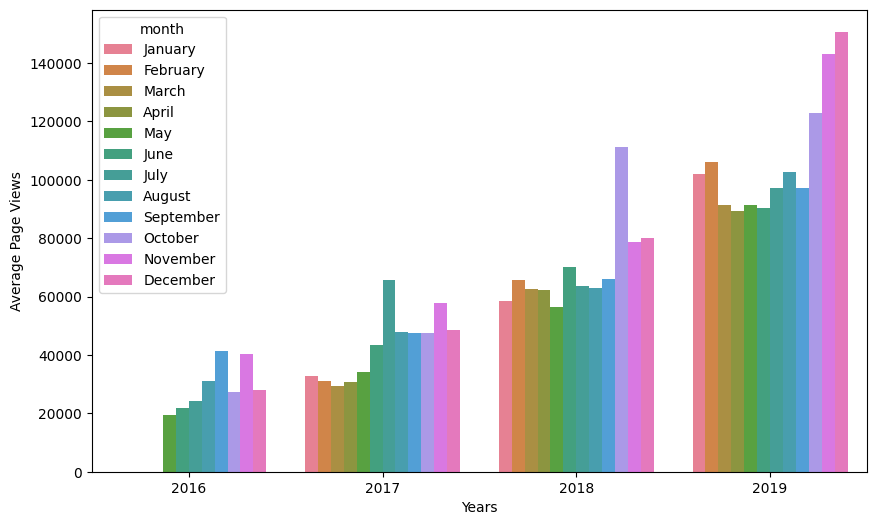

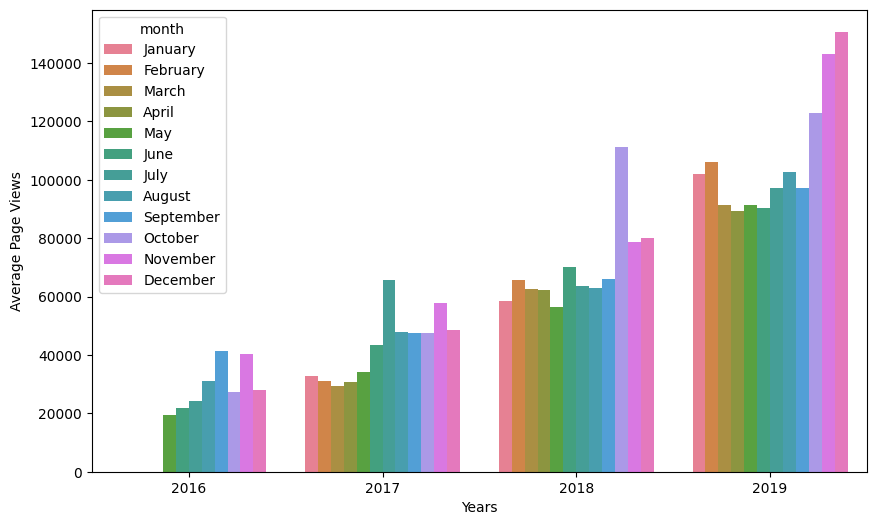

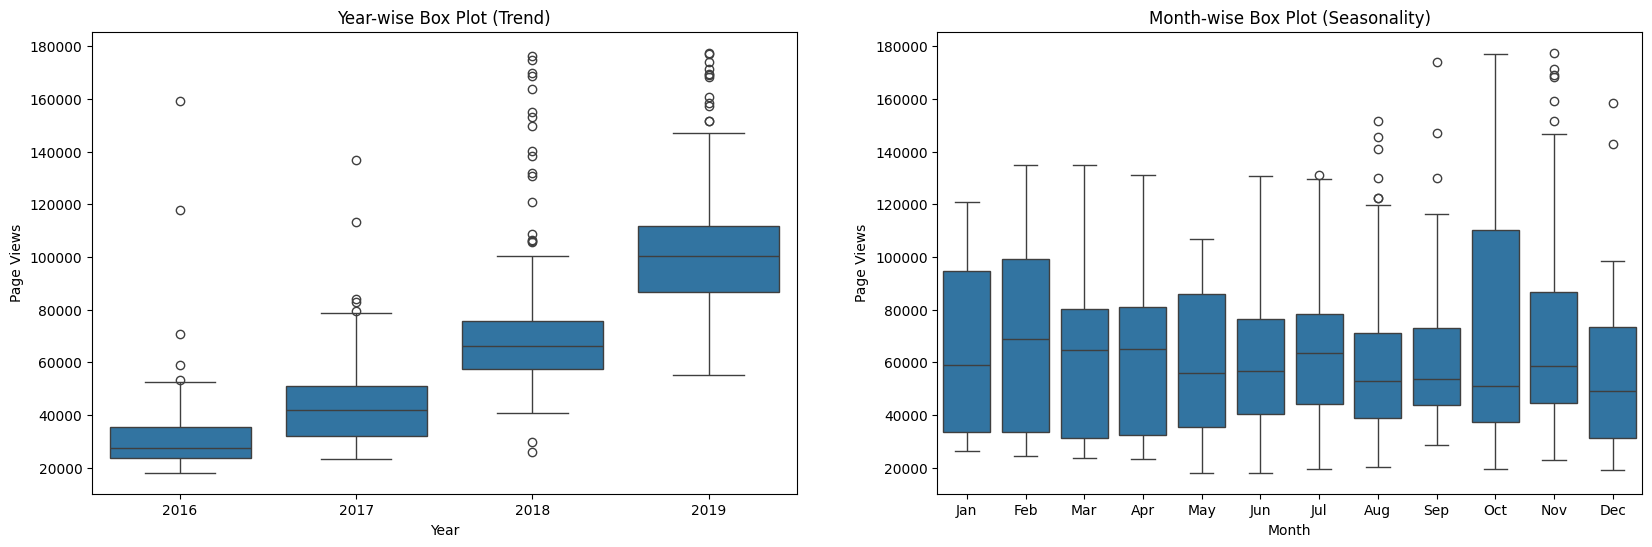

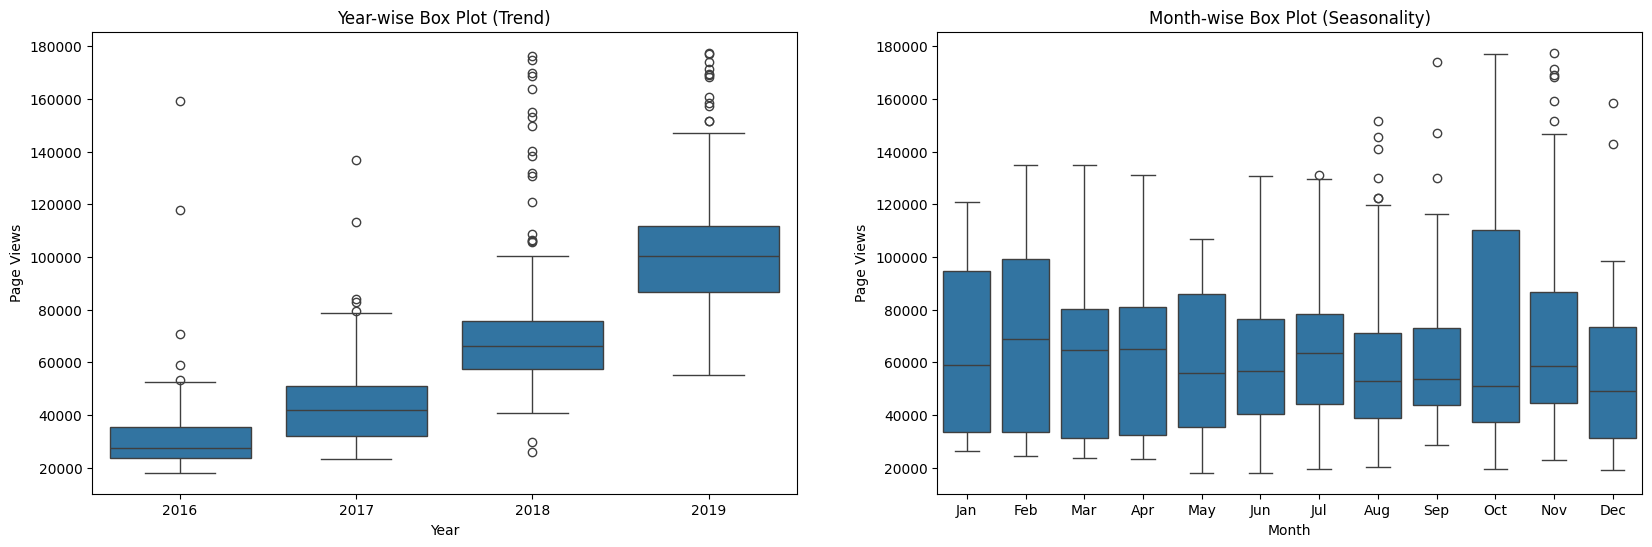

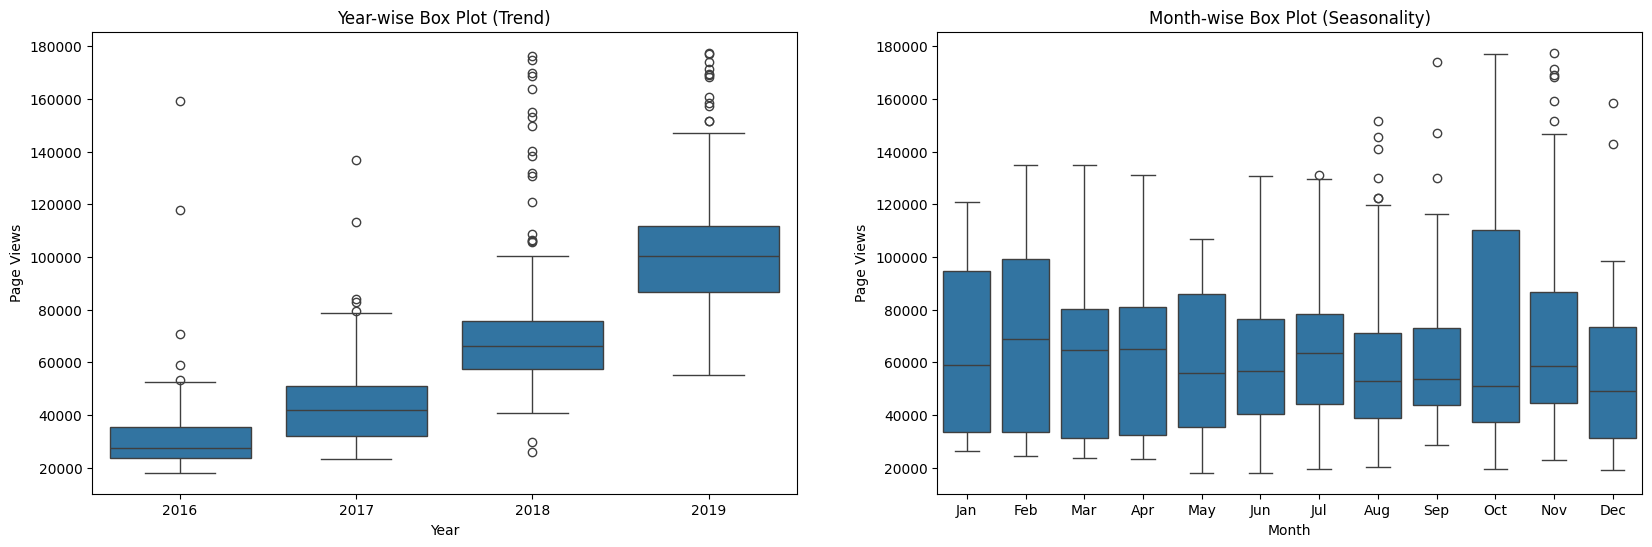

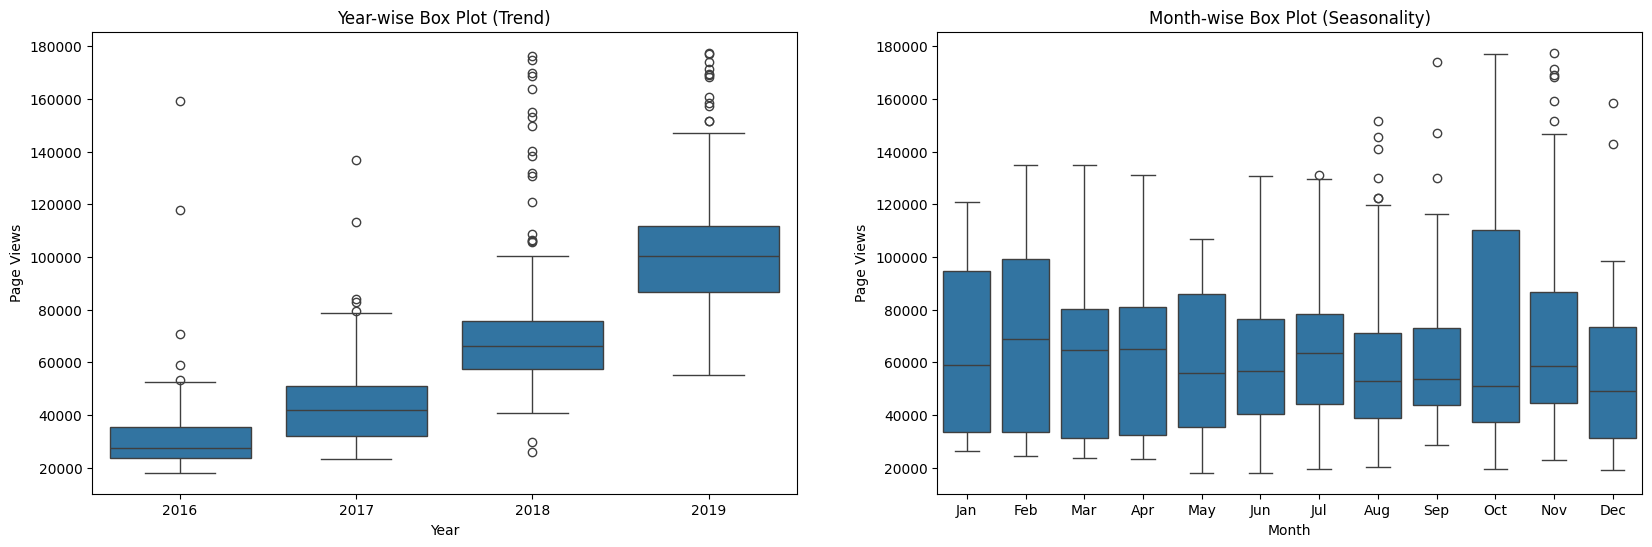

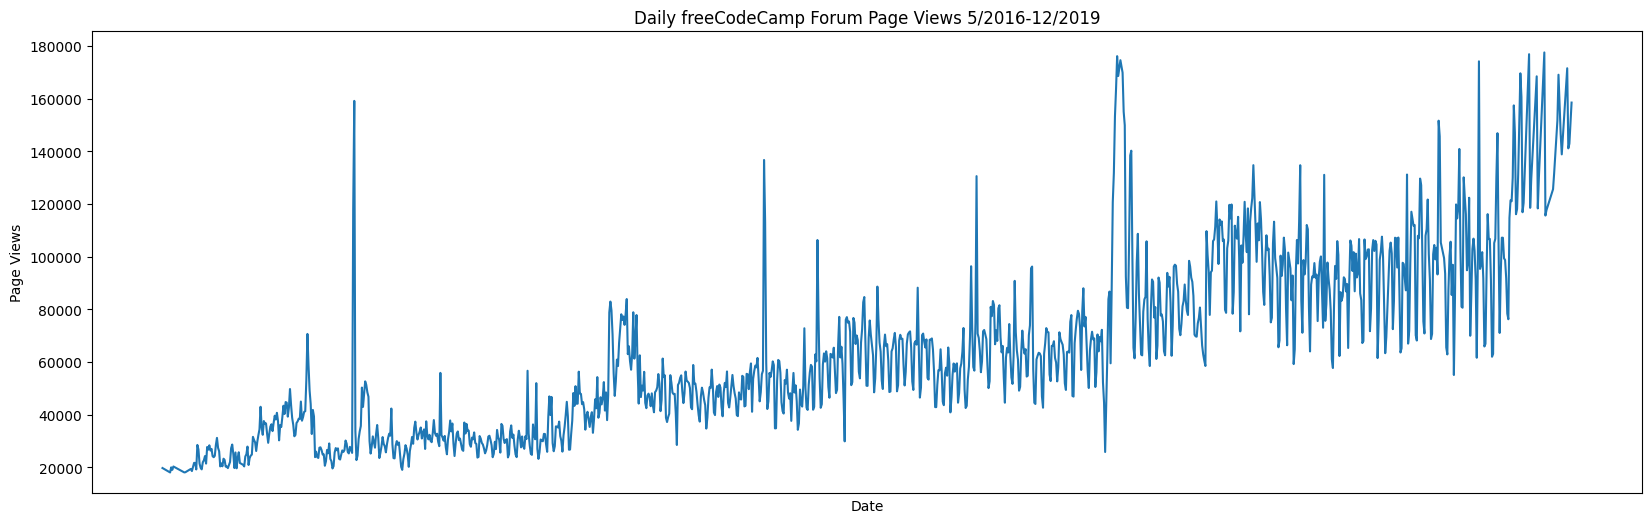

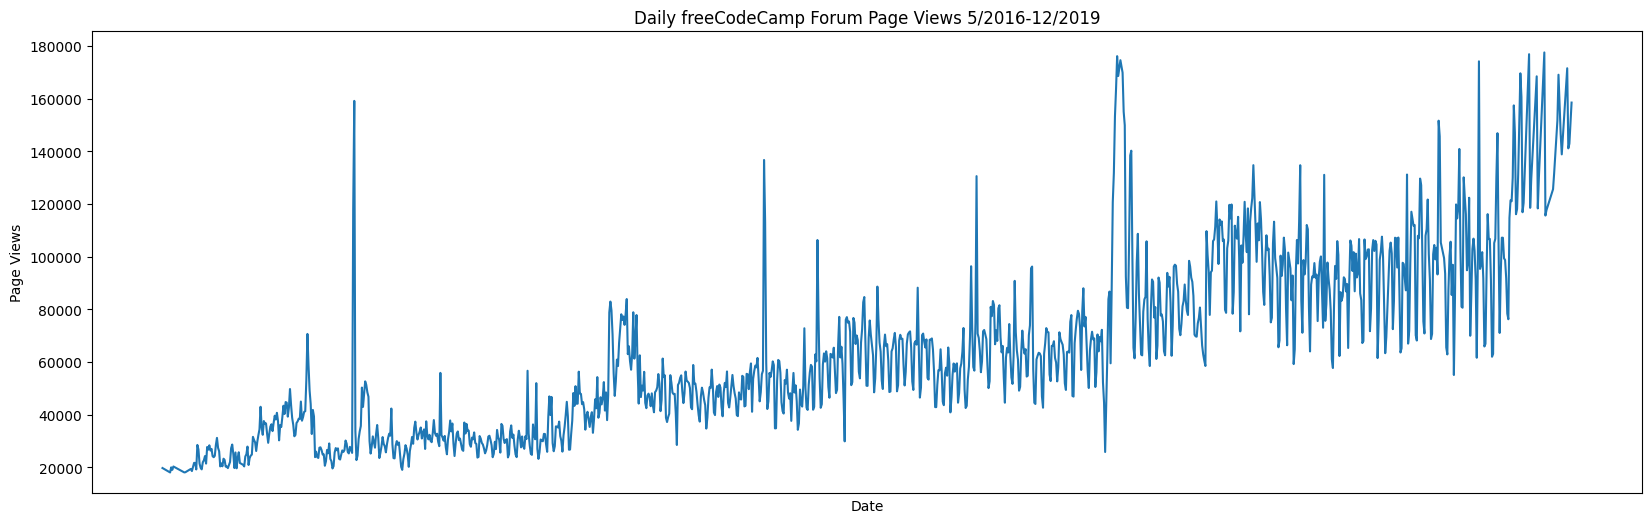

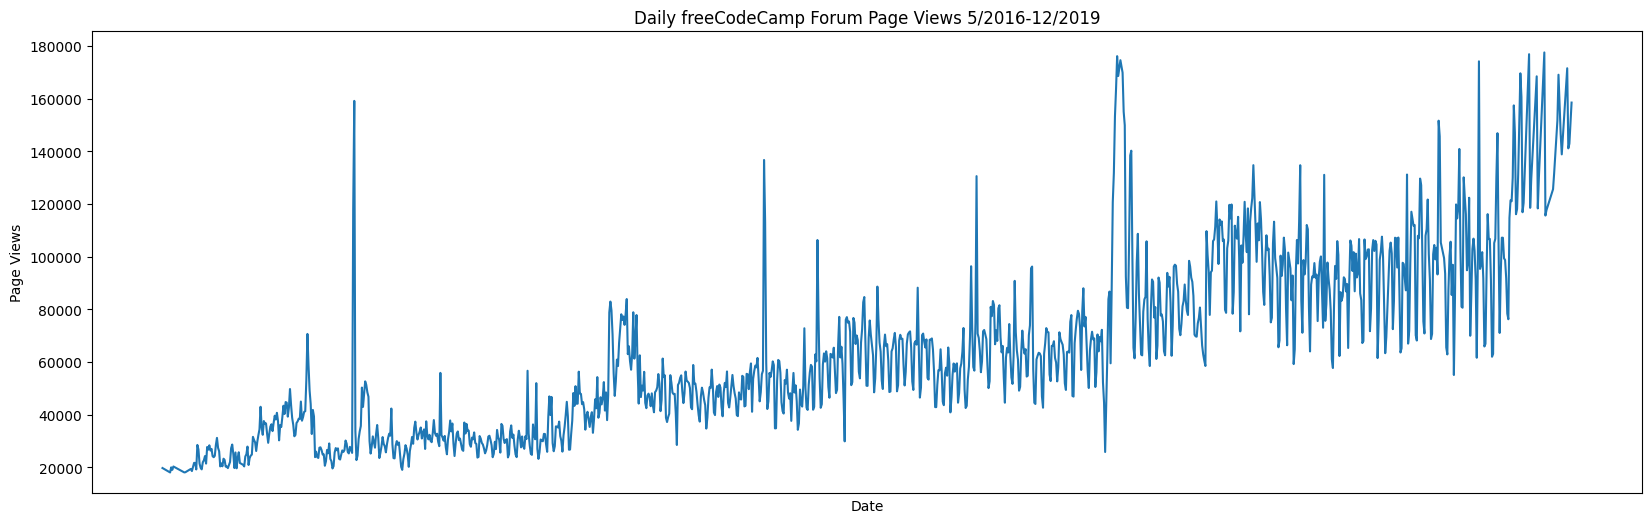

In [180]:
import unittest
import matplotlib as mpl

class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(actual, expected, "Expected DataFrame count after cleaning to be 1238.")

class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'")
    
    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Date'")
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Page Views'")

    def test_line_plot_data_quantity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(actual, expected, "Expected number of data points in line plot to be 1238.")


class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
          actual.append(label.get_text())
        expected = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")
    
    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(actual, expected, "Expected bar plot xlabel to be 'Years'")
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(actual, expected, "Expected bar plot ylabel to be 'Average Page Views'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'")


class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")
    
    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected box plot 1 xlabel to be 'Year'")
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 1 ylabel to be 'Page Views'")
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(actual, expected, "Expected box plot 2 xlabel to be 'Month'")
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 2 ylabel to be 'Page Views'")
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'")
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        self.assertEqual(actual, expected, "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'")
        actual = []
        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'")

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(actual, expected, "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'")
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(actual, expected, "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'")

    def test_box_plot_number_of_boxes(self):
        actual = len(self.ax1.lines) / 6 # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6 # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

unittest.main(argv=[''], verbosity=2, exit=False)
